In [19]:
import os
import mlxtend
import warnings
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import svm, metrics
from skater.model import InMemoryModel
from mlxtend.plotting import plot_decision_regions
from skater.core.explanations import Interpretation
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import confusion_matrix, roc_curve, auc
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [6]:
os.chdir("/Users/shenchingfeng/GitHub/ML-Wine-Type-and-Quality-Classification")

r = 'data/tred.csv'
w = 'data/twhite.csv'

red = pd.read_csv(r).drop(columns = "Unnamed: 0")
white = pd.read_csv(w).drop(columns = "Unnamed: 0")

red['type'] = 1
white['type'] = 0

df = pd.concat([red, white])

# Wine Type

### Hyperparameters Tuning

In [24]:
kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

model = LogisticRegression(max_iter = int(1e6))

X = df.drop("type", axis = 1)
y = df["type"]

params = {
    'C': [10**i for i in range(-5, 6)],
    'penalty': ['l1', 'l2', 'elasticnet', 'None'],
    'solver': ['lbfgs', 'liblinear', 'saga']   
}

grid_search = GridSearchCV(estimator = model, param_grid = params, cv = kf, n_jobs = -1, scoring = "accuracy")
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 1.0


### Features Selection

In [25]:
sfs = SFS(
    estimator = LogisticRegression(max_iter = int(1e7), C = 10, penalty = 'l1', solver = 'liblinear'),
    forward = True,
    floating = True,
    k_features = X.shape[1], 
    scoring = 'accuracy',
    n_jobs = -1
)

sfs.fit(X, y)

print(sfs.k_feature_names_)
print(round(sfs.k_score_, 4))

('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality')
1.0


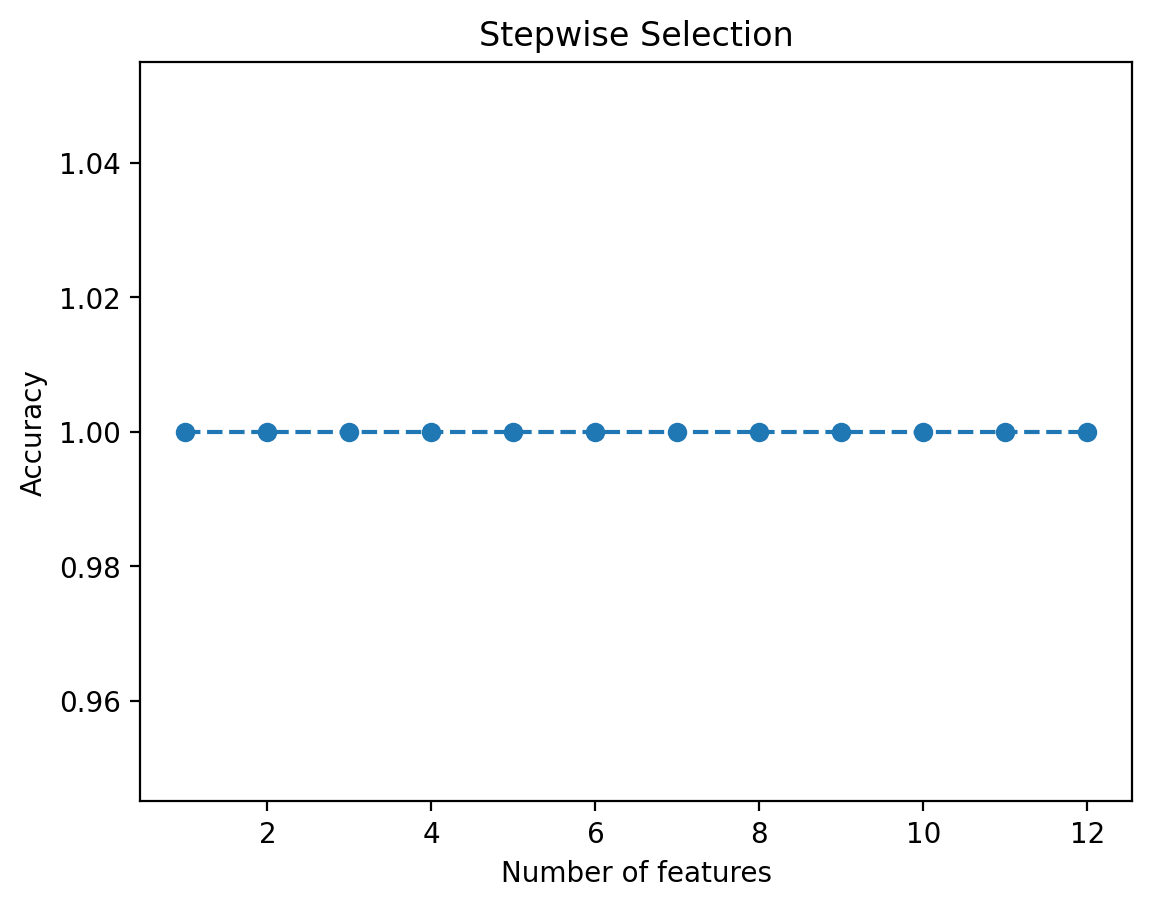

In [35]:
metric_dict = sfs.get_metric_dict()
k_features = list(metric_dict.keys())
avg_scores = np.array([metric_dict[k]['avg_score'] for k in k_features])

plt.plot(k_features, avg_scores, linestyle='--', marker='o')
plt.title("Stepwise Selection")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.show()

# Wine Quality

In [ ]:
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

model = LogisticRegression(max_iter = int(1e7))

X = df.drop("quality", axis = 1)
y = df["quality"]

params = {
    'C': [10**i for i in range(-5, 6)],
    'penalty': ['l1', 'l2', 'elasticnet', 'None'],
    'solver': ['lbfgs', 'liblinear', 'saga']   
}

grid_search = GridSearchCV(estimator = model, param_grid = params, cv = kf, n_jobs = -1, scoring = "accuracy")
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", round(grid_search.best_score_, 4))

In [ ]:
sfs = SFS(
    cv = kf, 
    estimator = LogisticRegression(max_iter = int(1e7), C = 10, penalty = 'l1', solver = 'liblinear'),
    forward = True,
    floating = True,
    k_features = "best", 
    scoring = 'f1',
    n_jobs = -1
)

sfs.fit(X, y)

print(sfs.k_feature_names_)
print(round(sfs.k_score_, 4))